# Outlier filtering

## Imports

In [67]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets as skds
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load data

In [68]:
boston = skds.load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Plots

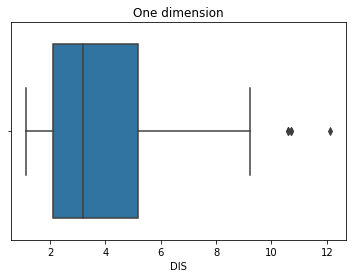

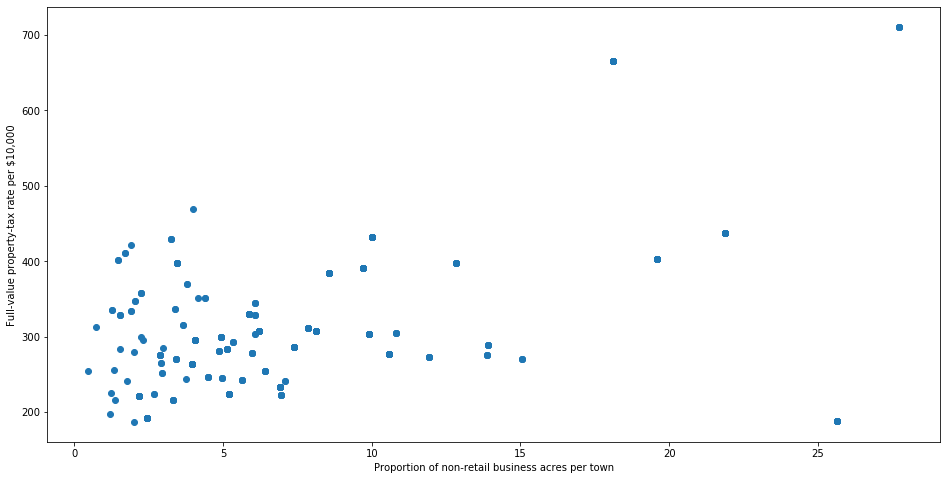

In [69]:
# One dimension
sns.boxplot(x=boston_df['DIS']).set_title('One dimension')

# Two dimensions
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

## Z scores

In [70]:
z = np.abs(stats.zscore(boston_df))
Z = pd.DataFrame(z)
Z.columns = columns
Z.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.419782,0.284830,1.287909,0.272599,0.144217,0.413672,0.120013,0.140214,0.982843,0.666608,1.459000,0.441052,1.075562
1,0.417339,0.487722,0.593381,0.272599,0.740262,0.194274,0.367166,0.557160,0.867883,0.987329,0.303094,0.441052,0.492439
2,0.417342,0.487722,0.593381,0.272599,0.740262,1.282714,0.265812,0.557160,0.867883,0.987329,0.303094,0.396427,1.208727
3,0.416750,0.487722,1.306878,0.272599,0.835284,1.016303,0.809889,1.077737,0.752922,1.106115,0.113032,0.416163,1.361517
4,0.412482,0.487722,1.306878,0.272599,0.835284,1.228577,0.511180,1.077737,0.752922,1.106115,0.113032,0.441052,1.026501
5,0.417044,0.487722,1.306878,0.272599,0.835284,0.207096,0.351157,1.077737,0.752922,1.106115,0.113032,0.410571,1.043322
6,0.410243,0.048772,0.476654,0.272599,0.265154,0.388411,0.070229,0.839244,0.523001,0.577519,1.505237,0.426798,0.031268
7,0.403696,0.048772,0.476654,0.272599,0.265154,0.160466,0.978808,1.024638,0.523001,0.577519,1.505237,0.441052,0.910700
8,0.395935,0.048772,0.476654,0.272599,0.265154,0.931206,1.117494,1.087196,0.523001,0.577519,1.505237,0.328448,2.421774
9,0.400729,0.048772,0.476654,0.272599,0.265154,0.399808,0.616090,1.329635,0.523001,0.577519,1.505237,0.329325,0.623344


## Z-score outlier filtering

In [75]:
out = np.where(z > 3)
Out = pd.DataFrame(out)
Out = Out.T
Out.head(15)

,0,1
0,55,1
1,56,1
2,57,1
3,102,11
4,141,12
5,142,3
6,152,3
7,154,3
8,155,3
9,160,3


In [76]:
threshold = 3
print(np.where(z > 3))
print(z[55][1])
print('\n')
print('row 55, col 1 : z =', z[55][1])
print('row 142, col 3 : z =', z[142][3])

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

A drawback of the Z-score method is that it behaves strangely in small datasets(e.g. it will never detect an outlier if the dataset has fewer than 12 items in it)  This motivated the development of a modified Z-score method, which does not suffer from the same limitation

In [87]:
def outliers_modified_z_score(ys):
    threshold = 3.5
    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

outs = outliers_modified_z_score(boston_df['CRIM'])
print(outs)
print('\n')
print(Z.iloc[34][:])

(array([ 34, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153,
       154, 155, 156, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       171, 310, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379,
       380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392,
       393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405,
       406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
       419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431,
       432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444,
       445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457,
       458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470,
       471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483,
       484, 485, 486, 487], dtype=int64),)


CRIM       0.232828
ZN         0.487722
INDUS      0.437258
CHAS       0.272599
NOX       

## Interquartile filtering

In [90]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

print(boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64
      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  F

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]